# Basic training loops

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Linear noised data preparation

In [2]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

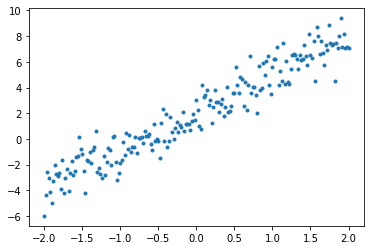

In [3]:
plt.plot(x, y, '.')

Define the model

In [4]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

In [6]:
model = MyModel()
print("Variables:", model.variables)

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [7]:
assert model(3.0).numpy() == 15.0

Define a loss function

In [9]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

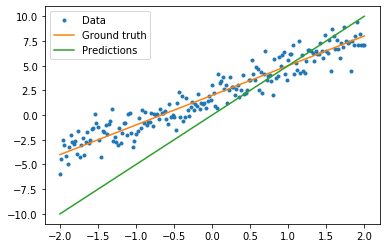

In [10]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()

In [12]:
print("Current loss: %1.2f" % loss(y, model(x)).numpy())

Current loss: 10.95


Define a training loop

In [13]:
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))

  dw, db = t.gradient(current_loss, [model.w, model.b])
  
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [14]:
model = MyModel()

weights = []
biases = []
epochs = range(10)

In [15]:
def report(model, loss):
  return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={loss:2.5f}"

In [16]:
def training_loop(model, x, y):
    
  for epoch in epochs:
    train(model, x, y, learning_rate=0.1)

    weights.append(model.w.numpy())
    biases.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print(f"Epoch {epoch:2d}:")
    print("    ", report(model, current_loss))

In [17]:
current_loss = loss(y, model(x))

print(f"Starting:")
print("    ", report(model, current_loss))

training_loop(model, x, y)

Starting:
     W = 5.00, b = 0.00, loss=10.94958
Epoch  0:
     W = 4.45, b = 0.41, loss=6.77636
Epoch  1:
     W = 4.04, b = 0.74, loss=4.38826
Epoch  2:
     W = 3.74, b = 1.00, loss=3.01083
Epoch  3:
     W = 3.53, b = 1.21, loss=2.20987
Epoch  4:
     W = 3.37, b = 1.38, loss=1.74028
Epoch  5:
     W = 3.25, b = 1.51, loss=1.46271
Epoch  6:
     W = 3.17, b = 1.62, loss=1.29733
Epoch  7:
     W = 3.11, b = 1.70, loss=1.19804
Epoch  8:
     W = 3.06, b = 1.77, loss=1.13798
Epoch  9:
     W = 3.03, b = 1.83, loss=1.10141


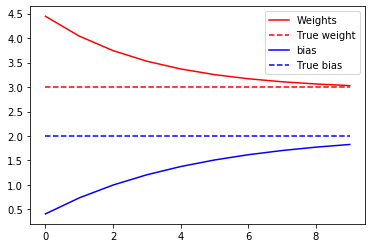

In [19]:
plt.plot(epochs, weights, label='Weights', color='r')
plt.plot(epochs, [TRUE_W] * len(epochs), '--', label = "True weight", color='r')

plt.plot(epochs, biases, label='bias', color='b')
plt.plot(epochs, [TRUE_B] * len(epochs), "--", label="True bias", color='b')

plt.legend()

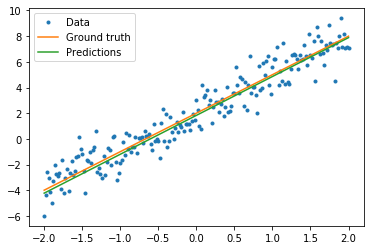

In [20]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()

In [21]:
print("Current loss: %1.6f" % loss(model(x), y).numpy())

Current loss: 1.101413


### The same solution, but with Keras

In [22]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def call(self, x):
    return self.w * x + self.b

In [23]:
keras_model = MyModelKeras()

training_loop(keras_model, x, y)

Epoch  0:
     W = 4.45, b = 0.41, loss=6.77636
Epoch  1:
     W = 4.04, b = 0.74, loss=4.38826
Epoch  2:
     W = 3.74, b = 1.00, loss=3.01083
Epoch  3:
     W = 3.53, b = 1.21, loss=2.20987
Epoch  4:
     W = 3.37, b = 1.38, loss=1.74028
Epoch  5:
     W = 3.25, b = 1.51, loss=1.46271
Epoch  6:
     W = 3.17, b = 1.62, loss=1.29733
Epoch  7:
     W = 3.11, b = 1.70, loss=1.19804
Epoch  8:
     W = 3.06, b = 1.77, loss=1.13798
Epoch  9:
     W = 3.03, b = 1.83, loss=1.10141
